# Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

# Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

# Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

## Texto elegido: 

### Oppening de la película Trainspotting (libro de Irvine Welsh)

"Choose Life. Choose a job. Choose a career. Choose a family. Choose a fucking big television. Choose washing machines, cars, compact disc players and electrical tin openers. Choose good health, low cholesterol, and dental insurance. Choose fixed interest mortgage repayments. Choose a starter home. **Choose your friends. Choose leisurewear and matching luggage. Choose a three-piece suit on hire purchase in a range of fucking fabrics. Choose DIY and wondering who the fuck you are on a sunday morning. Choose sitting on that couch watching mind-numbing, spirit-crushing game shows, stuffing fucking junk food into your mouth. Choose rotting away at the end of it all, pishing your last in a miserable home, nothing more than an embarrassment to the selfish, fucked up brats you spawned to replace yourself. Choose your future. Choose life"**

He marcado en negro la parte del texto que he utilizado para el análisis de sentimiento. He elegido este texto porque (además de que considero que la película y el libro son muy buenos) creo que se trata de un texto repleto de sarcasmo y acidez. Tengo curiosidad por ver cómo funcionarán los análisis! 

## Ejercicio 1

Calcula la frecuencia de las palabras

In [1]:
!pip install nltk #En un primer lugar, instalamos la librería nlkt

In [38]:
import nltk

In [ ]:
nltk.download('punkt') #para que funcione sent_tokenize
nltk.download('stopwords') #para que funcione stopwords

In [39]:
text="""Choose your friends. Choose leisurewear and matching luggage. Choose a three-piece suit on hire purchase in a range of fucking fabrics. Choose DIY and wondering who the fuck you are on a sunday morning. Choose sitting on that couch watching mind-numbing, spirit-crushing game shows, stuffing fucking junk food into your mouth. Choose rotting away at the end of it all, pishing your last in a miserable home, nothing more than an embarrassment to the selfish, fucked up brats you spawned to replace yourself. Choose your future. Choose life"""

Ahora vamos a probar a dividir nuestro texto en frases y, posteriormente, en palabras:

In [40]:
from nltk.tokenize import sent_tokenize
tokenized_text=sent_tokenize(text) #separamos el texto por frases
print(tokenized_text)

['Choose your friends.', 'Choose leisurewear and matching luggage.', 'Choose a three-piece suit on hire purchase in a range of fucking fabrics.', 'Choose DIY and wondering who the fuck you are on a sunday morning.', 'Choose sitting on that couch watching mind-numbing, spirit-crushing game shows, stuffing fucking junk food into your mouth.', 'Choose rotting away at the end of it all, pishing your last in a miserable home, nothing more than an embarrassment to the selfish, fucked up brats you spawned to replace yourself.', 'Choose your future.', 'Choose life']


In [41]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text) #Separamos el texto por palabras + signos de puntuación
print(tokenized_word)

['Choose', 'your', 'friends', '.', 'Choose', 'leisurewear', 'and', 'matching', 'luggage', '.', 'Choose', 'a', 'three-piece', 'suit', 'on', 'hire', 'purchase', 'in', 'a', 'range', 'of', 'fucking', 'fabrics', '.', 'Choose', 'DIY', 'and', 'wondering', 'who', 'the', 'fuck', 'you', 'are', 'on', 'a', 'sunday', 'morning', '.', 'Choose', 'sitting', 'on', 'that', 'couch', 'watching', 'mind-numbing', ',', 'spirit-crushing', 'game', 'shows', ',', 'stuffing', 'fucking', 'junk', 'food', 'into', 'your', 'mouth', '.', 'Choose', 'rotting', 'away', 'at', 'the', 'end', 'of', 'it', 'all', ',', 'pishing', 'your', 'last', 'in', 'a', 'miserable', 'home', ',', 'nothing', 'more', 'than', 'an', 'embarrassment', 'to', 'the', 'selfish', ',', 'fucked', 'up', 'brats', 'you', 'spawned', 'to', 'replace', 'yourself', '.', 'Choose', 'your', 'future', '.', 'Choose', 'life']


Ahora, vamos a calcular la frecuencia de las palabras que componen el texto:

In [43]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word) #usamos el texto dividido en palabras y contamos las palabras
print(fdist)
fdist.most_common(3) #Sacamos las 3 más comunes, que son "Choose", "." y "," 

<FreqDist with 67 samples and 100 outcomes>


[('Choose', 8), ('.', 7), (',', 5)]

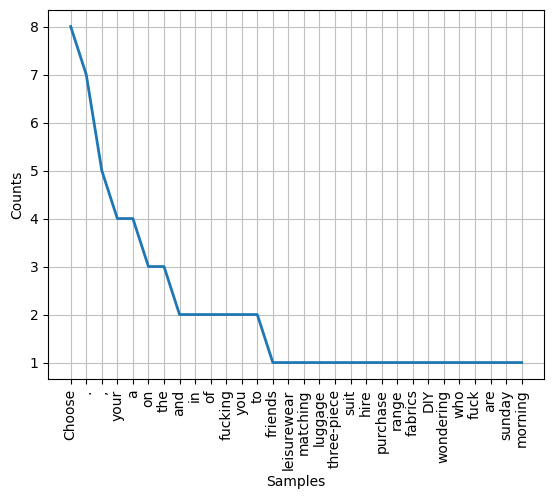

In [45]:
#Ploteamos los resultados de las frecuencias, que nos permite observar los resultados de manera más gráfica
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

## Ejercicio 2

Calcula los stopwords y realiza stemming a tu conjunto de datos

En primer lugar, vamos a calcular los "stopwords" que tiene el texto. Los "stopwords" son palabras que se consideran ruido, es decir, no son imprescindibles de cara a la interpretación del texto por parte de la máquina

In [47]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{"it's", "weren't", 'doesn', "mightn't", 'she', "she's", 'against', 'where', 'and', 'm', 'their', "shouldn't", 'out', 'same', 'can', 'needn', 'over', 'before', 'we', 'nor', 'am', 'again', 'up', 's', "needn't", 'those', "you'll", 'below', 'having', 'your', 'they', 'are', 'them', 'ourselves', 'has', 'there', 'down', "wasn't", 'as', 'that', 'because', 'on', 'above', 'y', 'were', 'during', 'it', 'its', 'or', 'into', 'myself', 'between', 'then', 'some', 't', "should've", 'few', 'whom', "wouldn't", 'shan', 'does', 'to', "you've", 'a', 'why', 'aren', 'should', 'haven', 'very', "shan't", 'will', 'had', 'here', 'is', 'until', 'after', 'this', 'these', 'shouldn', 'you', 'ma', "don't", 'o', 'mightn', "doesn't", 're', 'through', 'of', 'once', 'd', 'own', 'didn', 'our', 'when', 'which', "isn't", 'weren', 'more', 'yourself', 'off', 'themselves', "couldn't", 'the', 'all', 'at', "that'll", 'been', 'yourselves', 'who', 'my', 'than', 'won', 'no', 'his', 'being', "mustn't", 'by', 'he', 'ours', "haven't",

En la celda anterior podemos ver el tipo de palabras que se consideran "stopwords". Podemos crear una versión del texto filtrada que no contenga los stopwords y comparar con el texto original:

In [48]:
filtered_sent=[]
for w in tokenized_word: #
    if w not in stop_words: #si la palabra NO está en la lista de stopwords, se incorpora a la lista de filtered_sent
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Choose', 'your', 'friends', '.', 'Choose', 'leisurewear', 'and', 'matching', 'luggage', '.', 'Choose', 'a', 'three-piece', 'suit', 'on', 'hire', 'purchase', 'in', 'a', 'range', 'of', 'fucking', 'fabrics', '.', 'Choose', 'DIY', 'and', 'wondering', 'who', 'the', 'fuck', 'you', 'are', 'on', 'a', 'sunday', 'morning', '.', 'Choose', 'sitting', 'on', 'that', 'couch', 'watching', 'mind-numbing', ',', 'spirit-crushing', 'game', 'shows', ',', 'stuffing', 'fucking', 'junk', 'food', 'into', 'your', 'mouth', '.', 'Choose', 'rotting', 'away', 'at', 'the', 'end', 'of', 'it', 'all', ',', 'pishing', 'your', 'last', 'in', 'a', 'miserable', 'home', ',', 'nothing', 'more', 'than', 'an', 'embarrassment', 'to', 'the', 'selfish', ',', 'fucked', 'up', 'brats', 'you', 'spawned', 'to', 'replace', 'yourself', '.', 'Choose', 'your', 'future', '.', 'Choose', 'life']
Filterd Sentence: ['Choose', 'friends', '.', 'Choose', 'leisurewear', 'matching', 'luggage', '.', 'Choose', 'three-piece', 'sui

Podemos simplificar aún más el texto utilizando el "stemming". Con ello, lo que se hace es reducir las palabras a su raíz, para simplificar aun más el contenido:

In [49]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w)) #para cada palabra del texto ya filtrado

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Choose', 'friends', '.', 'Choose', 'leisurewear', 'matching', 'luggage', '.', 'Choose', 'three-piece', 'suit', 'hire', 'purchase', 'range', 'fucking', 'fabrics', '.', 'Choose', 'DIY', 'wondering', 'fuck', 'sunday', 'morning', '.', 'Choose', 'sitting', 'couch', 'watching', 'mind-numbing', ',', 'spirit-crushing', 'game', 'shows', ',', 'stuffing', 'fucking', 'junk', 'food', 'mouth', '.', 'Choose', 'rotting', 'away', 'end', ',', 'pishing', 'last', 'miserable', 'home', ',', 'nothing', 'embarrassment', 'selfish', ',', 'fucked', 'brats', 'spawned', 'replace', '.', 'Choose', 'future', '.', 'Choose', 'life']
Stemmed Sentence: ['choos', 'friend', '.', 'choos', 'leisurewear', 'match', 'luggag', '.', 'choos', 'three-piec', 'suit', 'hire', 'purchas', 'rang', 'fuck', 'fabric', '.', 'choos', 'diy', 'wonder', 'fuck', 'sunday', 'morn', '.', 'choos', 'sit', 'couch', 'watch', 'mind-numb', ',', 'spirit-crush', 'game', 'show', ',', 'stuf', 'fuck', 'junk', 'food', 'mouth', '.', 'choos',

## Ejercicio 3

Realiza sentiment analysis a tus datos.

Para realizar los análisis de sentimiento, empezaré empleando TextBlob

In [51]:
!pip install textblob 
#instalo textblob

In [33]:
from textblob import TextBlob #importo TextBlob

In [53]:
testimonial = TextBlob(text)
testimonial.sentiment

Sentiment(polarity=-0.36, subjectivity=0.5991666666666666)

Observamos que la polaridad da un resultado negativo (es decir, el texto tiende a la negatividad), aunque no se aleja mucho del 0 (relativamente neutro). La subjetividad está más cerca del 1, por lo cual podemos concluir que el texto es bastante subjetivo. Aunque respecto a la subjetividad creo que más o menos acierta, yo personalmente si leo el texto puedo percibir claramente la ironía y el sarcasmo que desprende. Si dependiera de mi, pondría una polaridad mucho más negativa

Decido probar otros analizadores de sentimientos para ver qué tal funcionan con este texto. Encuentro uno llamado **VADER** (Valence Aware Dictionary and Sentiment Reasoner). 

VADER da un output compuesto de 4 valores. La última de ellas (compound) se calcula a partir de normalizar los 3 scores anteriores (neg, neu y pos) entre -1 (lo más negativo) y 1 (lo más positivo).

In [55]:
pip install vaderSentiment #instalo Vader


     -------------------------------------- 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #importo el analizador de sentimientos

In [58]:
sid_obj= SentimentIntensityAnalyzer()
print(sid_obj.polarity_scores(text)) #ejecuto

{'neg': 0.169, 'neu': 0.8, 'pos': 0.03, 'compound': -0.9356}


Sorprendentemente, en este caso el valor compuesto es **muy** negativo! 

Decido probar un último sistema, en este caso usando **Transformers**. Está basado en Pytorch y Tensorflow, y permite trabajar con modelos preentrenados. https://huggingface.co/docs/transformers/index

In [60]:
#Instalo tensorflow desde la consola de Conda
#Instalo transformers con pytorch desde la consola de Conda: pip install transformers[torch]

In [61]:
import tensorflow as tf
print(tf.__version__) #compruebo versión de tensorflow
import torch as torch
print(torch.__version__) #compruebo versión de pytorch

2.11.0
1.13.1+cpu


In [62]:
import transformers as transformers
from transformers import pipeline
print(transformers.__version__) #versión de transformers

4.26.0


In [71]:
from transformers import pipeline; print(pipeline('sentiment-analysis')(text))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9995267391204834}]


En este caso también da un resultado muy negativo. Además, se recomienda no usar el modelo en default (como he hecho yo), así que es probable que especificando más parámetros los resultados fueran algo distintos